#Libraries

In [3]:
!pip install keras==2.12.0

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.7/1.7 MB 17.8 MB/s eta 0:00:00
  Attempting uninstall: keras
    Found existing installation: keras 2.14.0
    Uninstalling keras-2.14.0:
      Successfully uninstalled keras-2.14.0
ERROR: pip's dependency resolver does not currently take into account all the packages that are installed. This behaviour is the source of the following dependency conflicts.
tensorflow 2.14.0 requires keras<2.15,>=2.14.0, but you have keras 2.12.0 which is incompatible.


In [1]:


import numpy as np
import os
import math
import pandas as pd

#dimensionality reduction techniques
from sklearn.decomposition import PCA
from sklearn.manifold import TSNE

#Undersampling
from sklearn.utils import resample

#to embed and render HTML code
from IPython.display import HTML

#For visualisation
import matplotlib.pyplot as plt
import seaborn as sns #for heatmap

#For data preprocessing
from sklearn.preprocessing import StandardScaler #for standardisation of data
from sklearn.impute import SimpleImputer #for Imputation of missing values
import sklearn.model_selection as model_selection

#For Encoding and standardization
from sklearn.preprocessing import LabelEncoder #for encoding target column
from sklearn.preprocessing import OrdinalEncoder #for encoding categorical columns
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler
from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import OneHotEncoder

#Traditional Machine Learning models
from sklearn.linear_model import LinearRegression
from sklearn.linear_model import LogisticRegression
#from sklearn import svm
from sklearn.svm import SVC #support vector classifier
from sklearn.svm import SVR #support vector regression
from sklearn.ensemble import RandomForestRegressor
from sklearn.tree import DecisionTreeRegressor

from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import RandomizedSearchCV
from sklearn.tree import DecisionTreeClassifier

#for majority class to use for trivial baseline
from sklearn.dummy import DummyClassifier


# calculation metrics for a neural network & ML models using sklearn
from sklearn.datasets import make_circles
#from sklearn.metrics import accuracy_score
from sklearn.metrics import precision_score
from sklearn.metrics import recall_score
from sklearn.metrics import f1_score
#from sklearn.metrics import classification_report #for classification report
from sklearn.metrics import ConfusionMatrixDisplay, confusion_matrix #for confusion matrix
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report


from sklearn.model_selection import GridSearchCV #parameter tuning
from keras.models import Sequential #For neural network model
from keras.layers import Dense
from keras.wrappers.scikit_learn import KerasClassifier
from sklearn.model_selection import train_test_split #train,test splitting

from tensorflow.keras.preprocessing.image import ImageDataGenerator #for image reading

#clustering
from sklearn.cluster import DBSCAN
from sklearn.cluster import KMeans







#Read Dataset1

In [2]:
from google.colab import drive
drive.mount('/drive')  #connect colab to Google drive

df_Metal= pd.read_csv("/drive/My Drive/Colab Notebooks/Term1/ML/Course work/COMP1801_CourseworkDataset1_tabular.csv") #read csv file


df_Metal.head()

Mounted at /drive


,Lifespan,partType,microstructure,coolingRate,quenchTime,forgeTime,smallDefects,largeDefects,sliverDefects,seedLocation,castType
0,284.161690,Blade,colGrain,25,4.460592,7.937116,22,0,7,Top,Investment
1,1599.551748,Blade,singleGrain,9,1.425973,2.432948,2,0,0,Bottom,Die
2,768.311031,Nozzle,colGrain,26,2.508879,3.841211,25,0,0,Bottom,Investment
3,1697.663828,Blade,colGrain,12,3.248913,2.610700,10,0,0,Bottom,Continuous
4,1491.478862,Nozzle,colGrain,20,1.901670,4.634926,24,0,0,Top,Die


#Data Exploration

##Line plot

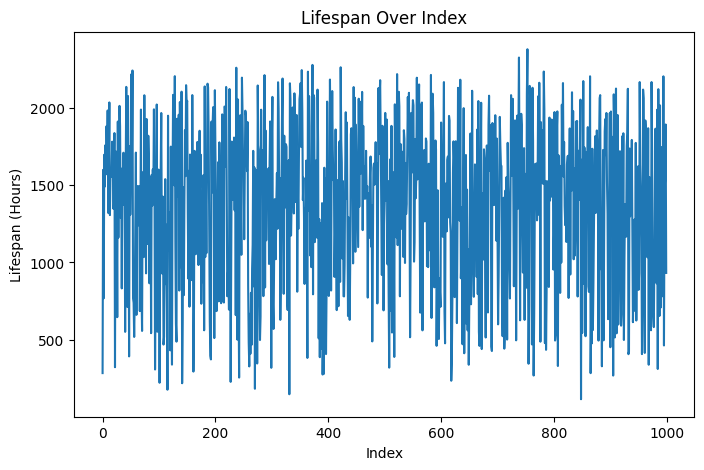

In [ ]:
plt.figure(figsize=(8, 5))
plt.plot(df_Metal['Lifespan'])
plt.title('Lifespan Over Index')
plt.xlabel('Index')
plt.ylabel('Lifespan (Hours)')
plt.show()


##Bar plot

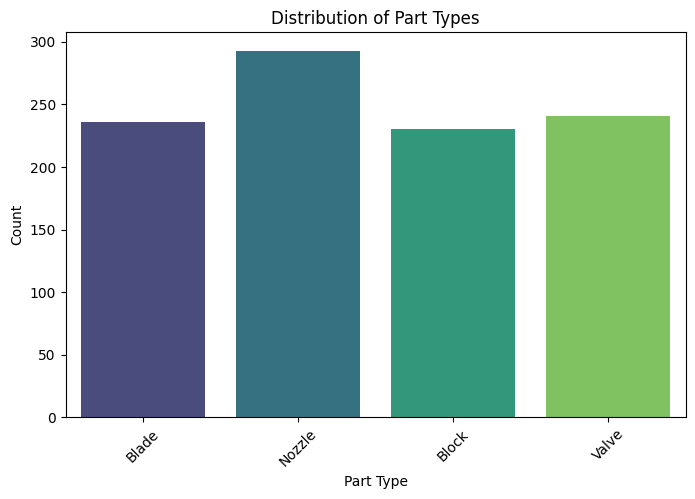

In [ ]:
plt.figure(figsize=(8, 5))
sns.countplot(data=df_Metal, x='partType', palette='viridis')
plt.title('Distribution of Part Types')
plt.xlabel('Part Type')
plt.ylabel('Count')
plt.xticks(rotation=45)
plt.show()

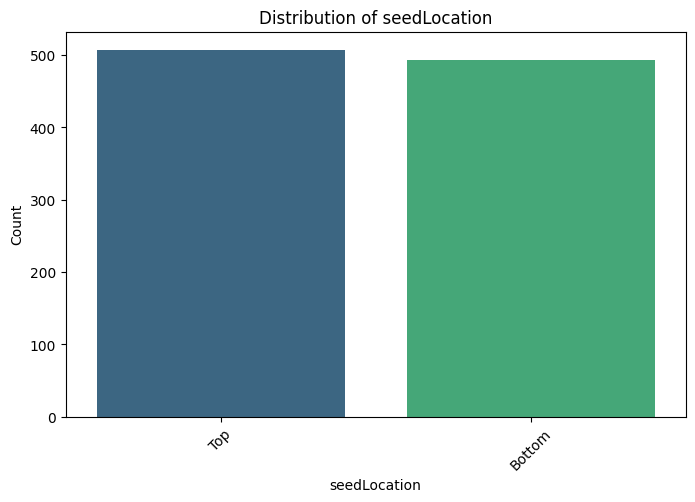

In [ ]:
plt.figure(figsize=(8, 5))
sns.countplot(data=df_Metal, x='seedLocation', palette='viridis')
plt.title('Distribution of seedLocation')
plt.xlabel('seedLocation')
plt.ylabel('Count')
plt.xticks(rotation=45)
plt.show()

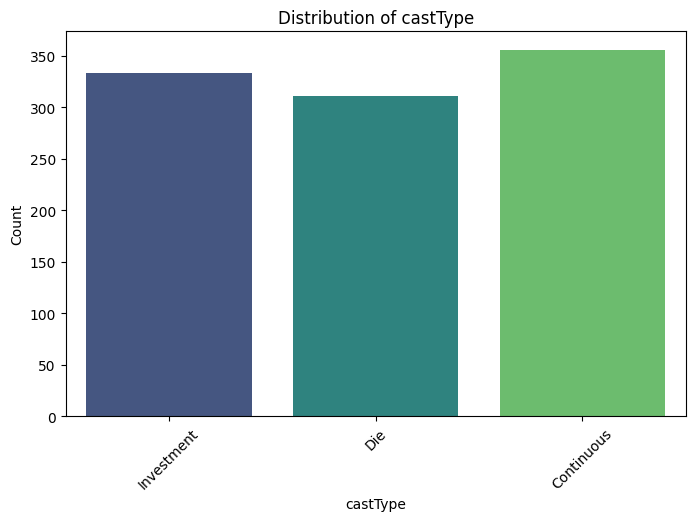

In [ ]:

plt.figure(figsize=(8, 5))
sns.countplot(data=df_Metal, x='castType', palette='viridis')
plt.title('Distribution of castType')
plt.xlabel('castType')
plt.ylabel('Count')
plt.xticks(rotation=45)
plt.show()

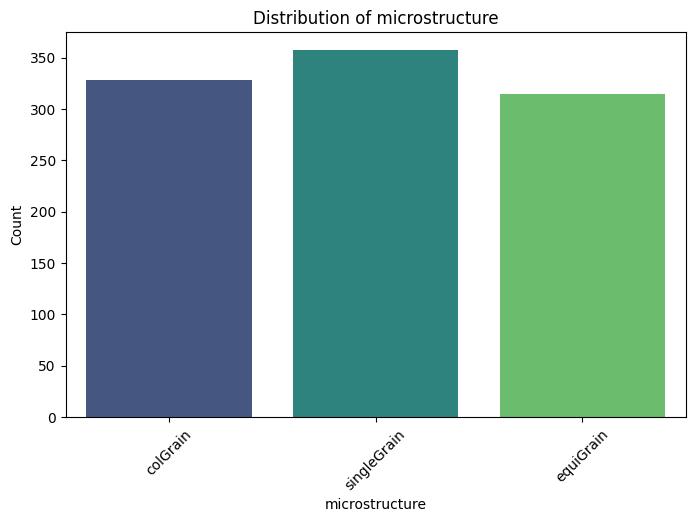

In [ ]:


plt.figure(figsize=(8, 5))
sns.countplot(data=df_Metal, x='microstructure', palette='viridis')
plt.title('Distribution of microstructure')
plt.xlabel('microstructure')
plt.ylabel('Count')
plt.xticks(rotation=45)
plt.show()

##Heat Map
Life span partially correlated with the quench time




Cooling rate and life span are negatively correlated

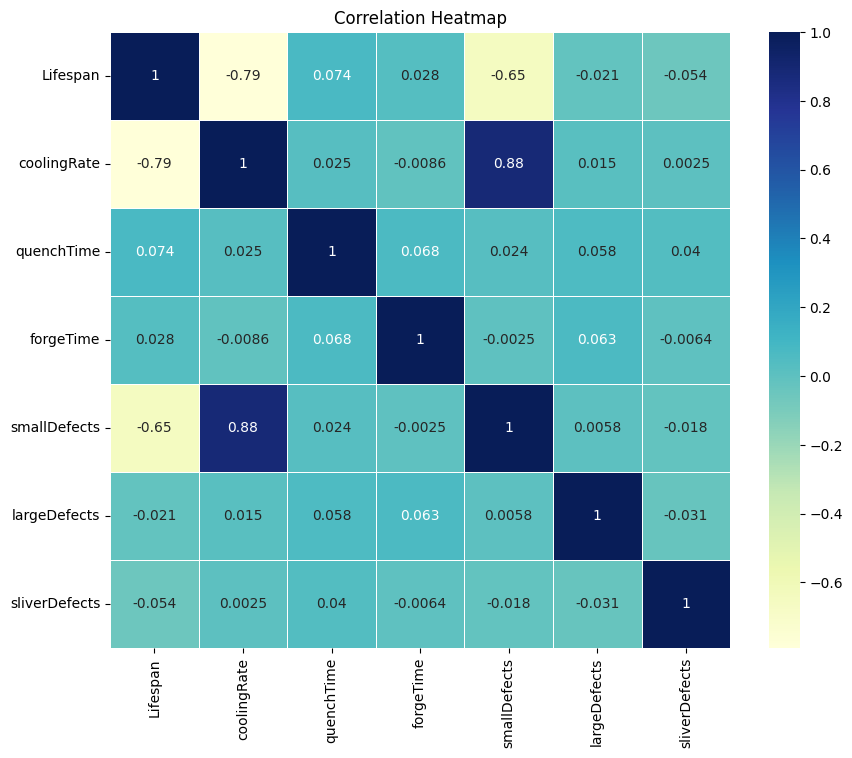

In [ ]:
# Select numerical columns for the heatmap
numerical_columns = df_Metal[['Lifespan', 'coolingRate', 'quenchTime', 'forgeTime', 'smallDefects', 'largeDefects', 'sliverDefects']]

plt.figure(figsize=(10, 8))
sns.heatmap(numerical_columns.corr(), annot=True, cmap='YlGnBu', linewidths=0.5)
plt.title('Correlation Heatmap')
plt.show()


* It is obvious as cooling rate increases the small defects increases as they are positive correlated, which in turn causes as small defects increases the lifespan decreases as they are negative correlated.

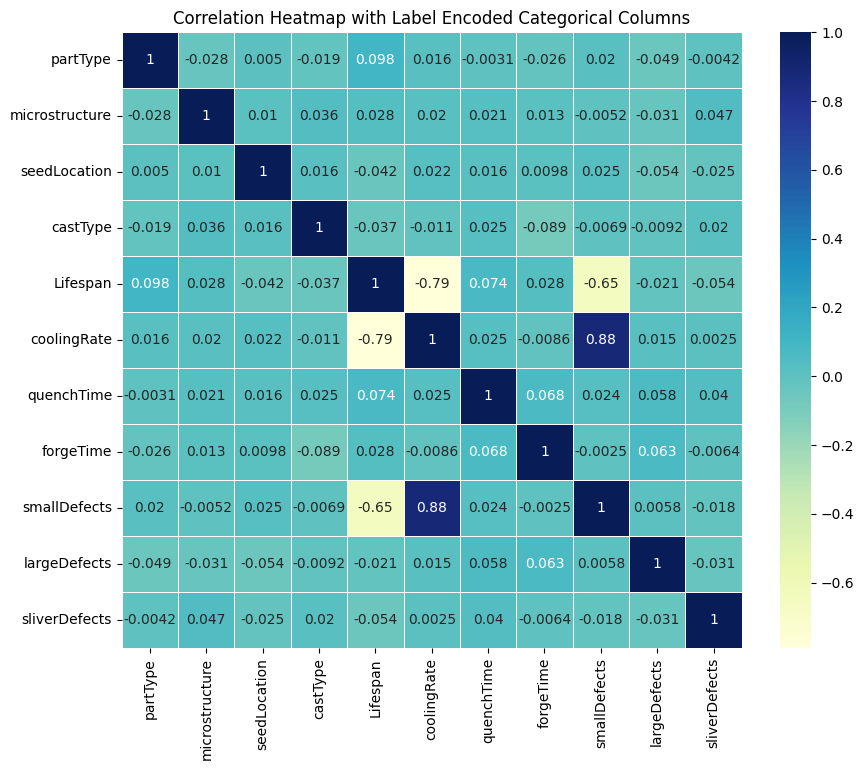

In [3]:
# Select categorical columns for label encoding
categorical_columns = df_Metal[['partType', 'microstructure', 'seedLocation', 'castType']]

# Initialize the LabelEncoder
label_encoder = LabelEncoder()

# Encode the categorical columns
encoded_categorical_columns = categorical_columns.apply(label_encoder.fit_transform)

# Concatenate the encoded categorical columns with the numerical columns
df_encoded = pd.concat([encoded_categorical_columns, df_Metal[['Lifespan', 'coolingRate', 'quenchTime', 'forgeTime', 'smallDefects', 'largeDefects', 'sliverDefects']]], axis=1)

# Create a heatmap of the correlations
plt.figure(figsize=(10, 8))
sns.heatmap(df_encoded.corr(), annot=True, cmap='YlGnBu', linewidths=0.5)
plt.title('Correlation Heatmap with Label Encoded Categorical Columns')
plt.show()


In [ ]:
df_encoded

,partType,microstructure,seedLocation,castType,Lifespan,coolingRate,quenchTime,forgeTime,smallDefects,largeDefects,sliverDefects
0,0,0,1,2,284.161690,25,4.460592,7.937116,22,0,7
1,0,2,0,1,1599.551748,9,1.425973,2.432948,2,0,0
2,2,0,0,2,768.311031,26,2.508879,3.841211,25,0,0
3,0,0,0,0,1697.663828,12,3.248913,2.610700,10,0,0
4,2,0,1,1,1491.478862,20,1.901670,4.634926,24,0,0
...,...,...,...,...,...,...,...,...,...,...,...
995,0,1,0,0,462.984817,24,2.023624,2.741713,20,0,0
996,2,1,0,2,1426.298870,21,1.741670,7.206022,12,0,0
997,0,0,1,2,1538.072772,14,1.658847,8.276388,12,0,0
998,2,1,0,0,1893.052813,9,2.124314,5.033330,0,0,0


In [ ]:
df_Metal[['partType', 'microstructure', 'seedLocation', 'castType']]

#Blade  0
#Nozzle 2
#Block  1
#Valve  3


,partType,microstructure,seedLocation,castType
0,Blade,colGrain,Top,Investment
1,Blade,singleGrain,Bottom,Die
2,Nozzle,colGrain,Bottom,Investment
3,Blade,colGrain,Bottom,Continuous
4,Nozzle,colGrain,Top,Die
...,...,...,...,...
995,Blade,equiGrain,Bottom,Continuous
996,Nozzle,equiGrain,Bottom,Investment
997,Blade,colGrain,Top,Investment
998,Nozzle,equiGrain,Bottom,Continuous


##Encoded categorical columns values

In [ ]:
print(df_Metal['partType'].unique())
df_encoded['partType'].unique()

['Blade' 'Nozzle' 'Block' 'Valve']


array([0, 2, 1, 3])

In [ ]:
print(df_Metal['microstructure'].unique())
df_encoded['microstructure'].unique()

['colGrain' 'singleGrain' 'equiGrain']


array([0, 2, 1])

In [ ]:
print(df_Metal['seedLocation'].unique())
df_encoded['seedLocation'].unique()

['Top' 'Bottom']


array([1, 0])

In [ ]:

print(df_Metal['castType'].unique())
df_encoded['castType'].unique()

['Investment' 'Die' 'Continuous']


array([2, 1, 0])

#Traditional ML model

##Linear regression

The data is split into train 80% and test 20%.

Lifespan is the target variable.

A regressor is a specific machine learning model or algorithm that is designed for regression tasks

Regression refers to a class of supervised learning techniques used for predicting a continuous target variable (dependent variable) based on one or more input features (independent variables).

In [ ]:
import pandas as pd
from sklearn.model_selection import train_test_split

from sklearn.metrics import mean_squared_error, r2_score

# Assuming you have already loaded and preprocessed your data into df_Metal
# Select features (independent variables) and target (dependent variable)
X = df_encoded.drop(['Lifespan'],axis=1)

y = df_encoded['Lifespan']

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Create and train the linear regression model
model = LinearRegression()
model.fit(X_train, y_train)

# Make predictions on the test data
y_pred = model.predict(X_test)
y_train_pred = model.predict(X_train)

# Evaluate the model
mse = mean_squared_error(y_train, y_train_pred)
r2 = r2_score(y_train, y_train_pred)
print("Train results")
print(f"Mean Squared Error (MSE): {mse}")
print(f"R-squared (R2): {r2}")
print("\n")
# Evaluate the model
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)
print("Test results")
print(f"Mean Squared Error (MSE): {mse}")
print(f"R-squared (R2): {r2}")


Train results
Mean Squared Error (MSE): 90495.35970225977
R-squared (R2): 0.6572414882555868


Test results
Mean Squared Error (MSE): 92267.87361490449
R-squared (R2): 0.6784326279640736


##Actual vs predicted plot

Below results show that most of the values are around the diagonal curve indicating that the model has fitted good. If the values have been more scattered away from diagonal it would indicate the poor performance of the model.

The R2 score from above results also showing that the model has been 60% good fit among actual vs predicted values.

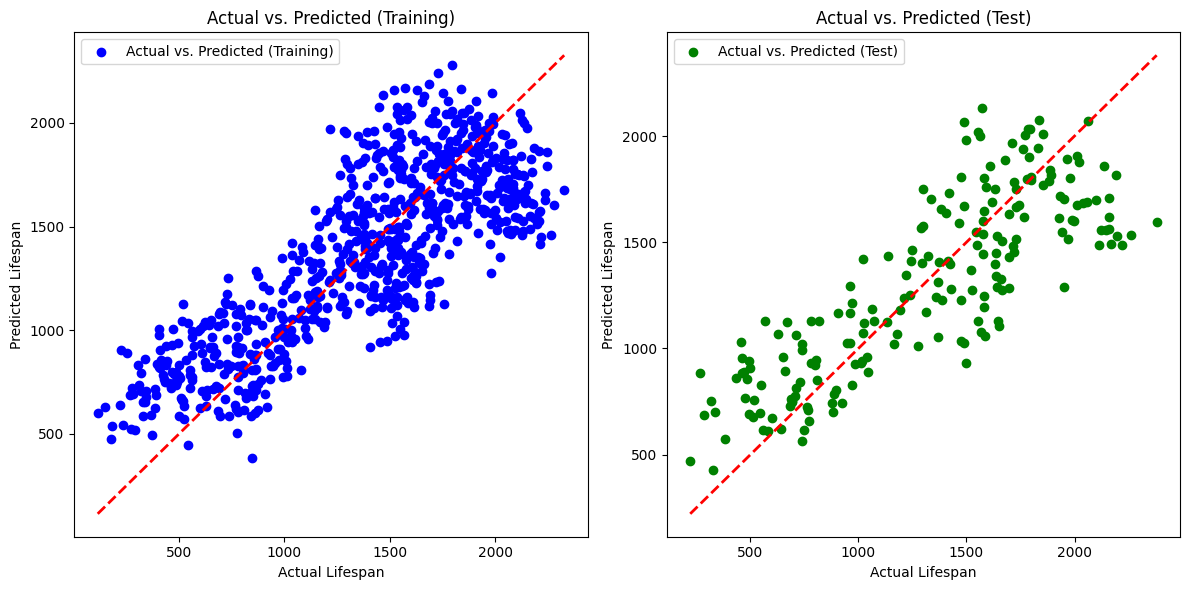

In [ ]:
import matplotlib.pyplot as plt

# Assuming you have already trained the Linear Regression model and have predictions
y_train_pred = model.predict(X_train)
y_test_pred = model.predict(X_test)

# Create actual vs. predicted plots for training data
plt.figure(figsize=(12, 6))
plt.subplot(1, 2, 1)
plt.scatter(y_train, y_train_pred, c='b', label='Actual vs. Predicted (Training)')
plt.xlabel('Actual Lifespan')
plt.ylabel('Predicted Lifespan')
plt.title('Actual vs. Predicted (Training)')
plt.legend(loc='upper left')
plt.plot([min(y_train), max(y_train)], [min(y_train), max(y_train)], linestyle='--', color='red', linewidth=2)

# Create actual vs. predicted plots for test data
plt.subplot(1, 2, 2)
plt.scatter(y_test, y_test_pred, c='g', label='Actual vs. Predicted (Test)')
plt.xlabel('Actual Lifespan')
plt.ylabel('Predicted Lifespan')
plt.title('Actual vs. Predicted (Test)')
plt.legend(loc='upper left')
plt.plot([min(y_test), max(y_test)], [min(y_test), max(y_test)], linestyle='--', color='red', linewidth=2)

plt.tight_layout()
plt.show()


##SVR(Support vector regression)

In [ ]:

# Create an SVR model
svr = SVR(kernel='linear', C=1.0, epsilon=0.2)

# Train the SVR model on the training data
svr.fit(X_train, y_train)

# Make predictions on the test data
y_pred = svr.predict(X_test)
y_train_pred = svr.predict(X_train)


mse = mean_squared_error(y_train, y_train_pred)
r2 = r2_score(y_train, y_train_pred)
print("Train results")
print(f"Mean Squared Error (MSE): {mse}")
print(f"R-squared (R2): {r2}")
print("\n")

# Evaluate the SVR model
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)
print("Test results")
print(f"Mean Squared Error (MSE): {mse}")
print(f"R-squared (R2): {r2}")


Train results
Mean Squared Error (MSE): 92123.93335642797
R-squared (R2): 0.651073133504521


Test results
Mean Squared Error (MSE): 91404.71308725674
R-squared (R2): 0.6814408718050371


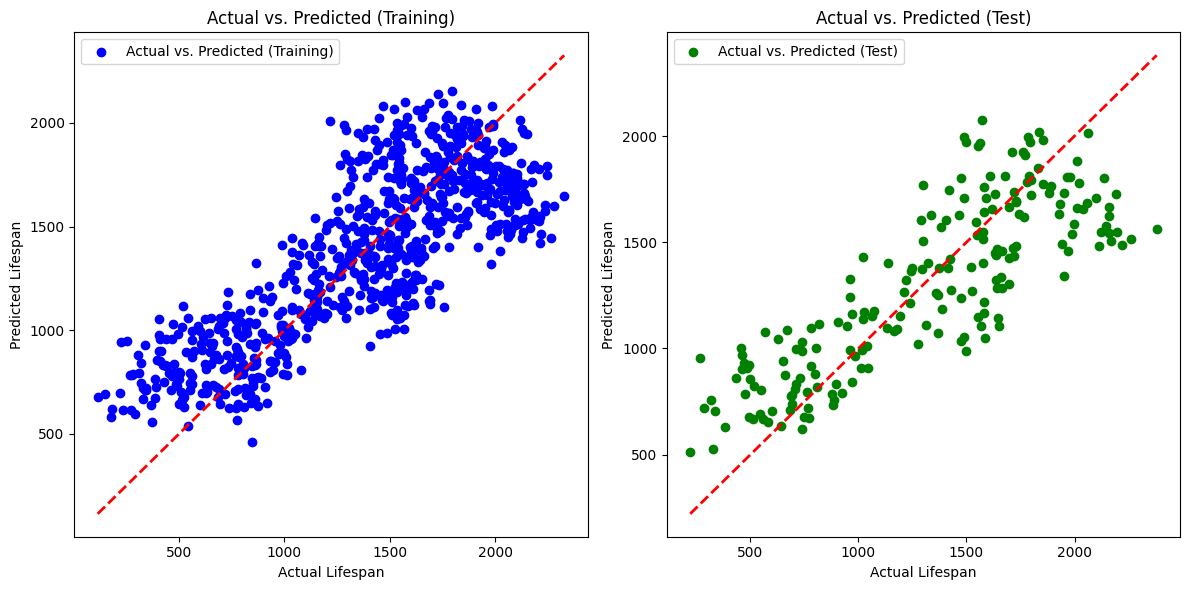

In [ ]:
import matplotlib.pyplot as plt

# Assuming you have already trained the Linear Regression model and have predictions
y_train_pred = svr.predict(X_train)
y_test_pred = svr.predict(X_test)

# Create actual vs. predicted plots for training data
plt.figure(figsize=(12, 6))
plt.subplot(1, 2, 1)
plt.scatter(y_train, y_train_pred, c='b', label='Actual vs. Predicted (Training)')
plt.xlabel('Actual Lifespan')
plt.ylabel('Predicted Lifespan')
plt.title('Actual vs. Predicted (Training)')
plt.legend(loc='upper left')
plt.plot([min(y_train), max(y_train)], [min(y_train), max(y_train)], linestyle='--', color='red', linewidth=2)

# Create actual vs. predicted plots for test data
plt.subplot(1, 2, 2)
plt.scatter(y_test, y_test_pred, c='g', label='Actual vs. Predicted (Test)')
plt.xlabel('Actual Lifespan')
plt.ylabel('Predicted Lifespan')
plt.title('Actual vs. Predicted (Test)')
plt.legend(loc='upper left')
plt.plot([min(y_test), max(y_test)], [min(y_test), max(y_test)], linestyle='--', color='red', linewidth=2)

plt.tight_layout()
plt.show()


##Random Forest Regression

ALthough the R2 score indicated that the model is fitting good, 99% accuracy, the actual vs predicted scatter plot indicated that the model did not learn anything significant and it is overfitting.

In [ ]:


# Create a Random Forest Regressor model
rf_model = RandomForestRegressor(n_estimators=100, random_state=42)

# Train the model on the training data
rf_model.fit(X_train, y_train)

# Make predictions on both the training and test data
y_train_pred = rf_model.predict(X_train)
y_test_pred = rf_model.predict(X_test)

# Evaluate the model on the training data
mse_train = mean_squared_error(y_train, y_train_pred)
r2_train = r2_score(y_train, y_train_pred)

# Evaluate the model on the test data
mse_test = mean_squared_error(y_test, y_test_pred)
r2_test = r2_score(y_test, y_test_pred)

print("Training Results:")
print(f"Mean Squared Error (MSE): {mse_train}")
print(f"R-squared (R2): {r2_train}\n")

print("Test Results:")
print(f"Mean Squared Error (MSE): {mse_test}")
print(f"R-squared (R2): {r2_test}")


Training Results:
Mean Squared Error (MSE): 834.8399132396905
R-squared (R2): 0.9968379761443202

Test Results:
Mean Squared Error (MSE): 5714.755992239428
R-squared (R2): 0.9800832186301284


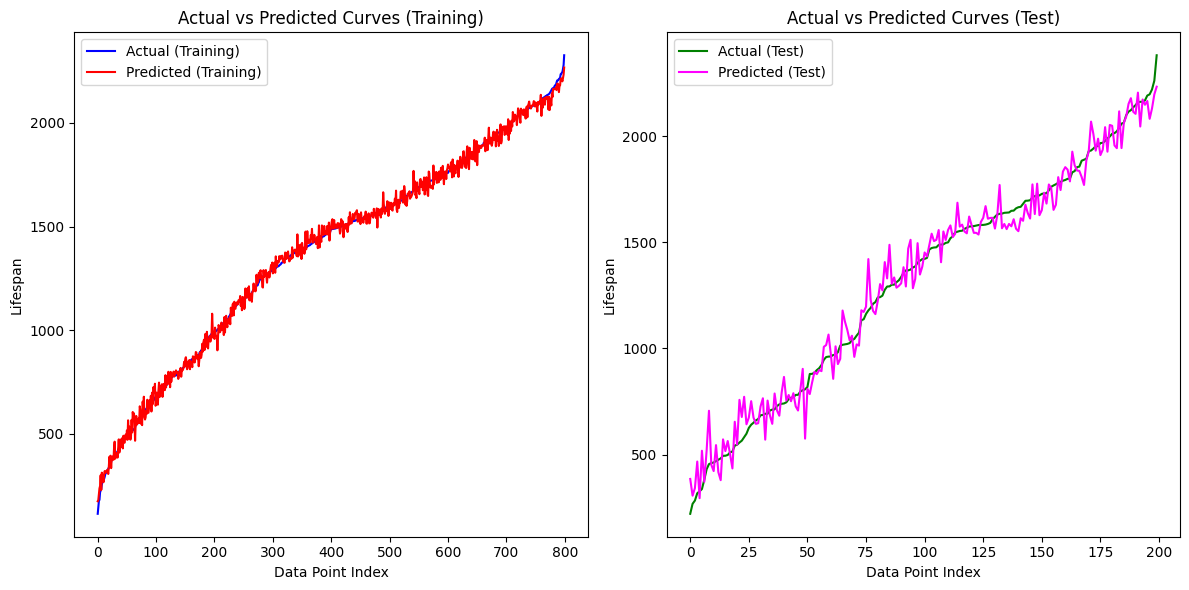

In [ ]:
import matplotlib.pyplot as plt
import numpy as np

# Assuming you have already trained the Random Forest Regressor model and made predictions
y_train_pred = rf_model.predict(X_train)
y_test_pred = rf_model.predict(X_test)

# Create sorted indices for the actual values (to plot a curve)
sorted_indices_train = np.argsort(y_train)
sorted_indices_test = np.argsort(y_test)

# Sort actual and predicted values
y_train = y_train.iloc[sorted_indices_train]
y_test = y_test.iloc[sorted_indices_test]
y_train_pred = y_train_pred[sorted_indices_train]
y_test_pred = y_test_pred[sorted_indices_test]

# Plot the actual vs predicted curves for the training data
plt.figure(figsize=(12, 6))
plt.subplot(1, 2, 1)
plt.plot(range(len(y_train)), y_train, label='Actual (Training)', color='blue')
plt.plot(range(len(y_train_pred)), y_train_pred, label='Predicted (Training)', color='red')
plt.xlabel('Data Point Index')
plt.ylabel('Lifespan')
plt.title('Actual vs Predicted Curves (Training)')
plt.legend()

# Plot the actual vs predicted curves for the test data
plt.subplot(1, 2, 2)
plt.plot(range(len(y_test)), y_test, label='Actual (Test)', color='green')
plt.plot(range(len(y_test_pred)), y_test_pred, label='Predicted (Test)', color='magenta')
plt.xlabel('Data Point Index')
plt.ylabel('Lifespan')
plt.title('Actual vs Predicted Curves (Test)')
plt.legend()

plt.tight_layout()
plt.show()


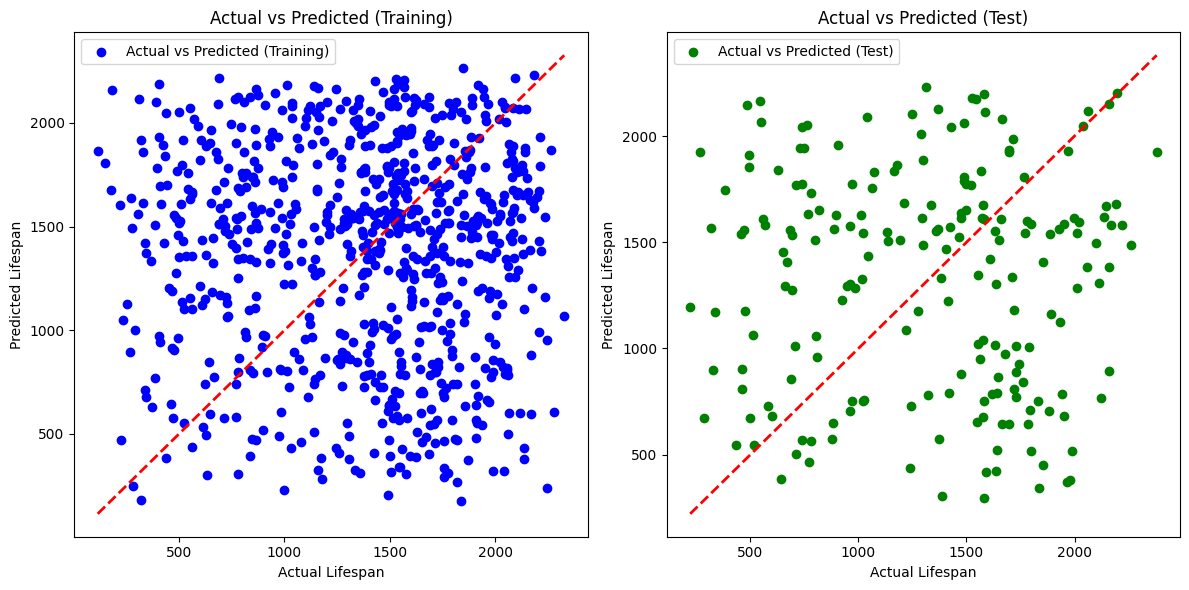

In [ ]:
import matplotlib.pyplot as plt

# Assuming you have already trained the Random Forest Regressor model and made predictions
y_train_pred = rf_model.predict(X_train)
y_test_pred = rf_model.predict(X_test)

# Create scatter plots for the training data
plt.figure(figsize=(12, 6))
plt.subplot(1, 2, 1)
plt.scatter(y_train, y_train_pred, c='b', label='Actual vs Predicted (Training)')
plt.xlabel('Actual Lifespan')
plt.ylabel('Predicted Lifespan')
plt.title('Actual vs Predicted (Training)')
plt.legend()
plt.plot([min(y_train), max(y_train)], [min(y_train), max(y_train)], linestyle='--', color='red', linewidth=2)

# Create scatter plots for the test data
plt.subplot(1, 2, 2)
plt.scatter(y_test, y_test_pred, c='g', label='Actual vs Predicted (Test)')
plt.xlabel('Actual Lifespan')
plt.ylabel('Predicted Lifespan')
plt.title('Actual vs Predicted (Test)')
plt.legend()
plt.plot([min(y_test), max(y_test)], [min(y_test), max(y_test)], linestyle='--', color='red', linewidth=2)

plt.tight_layout()
plt.show()


##Decision Tree Regression

Clearly Train R2 score show the model is overfitting, and test R2 score indicate that the model is performing poorly.

In [ ]:


# Create a Decision Tree Regressor model
dt_model = DecisionTreeRegressor(random_state=42)

# Train the model on the training data
dt_model.fit(X_train, y_train)

# Make predictions on both the training and test data
y_train_pred = dt_model.predict(X_train)
y_test_pred = dt_model.predict(X_test)

# Evaluate the model on the training data
mse_train = mean_squared_error(y_train, y_train_pred)
r2_train = r2_score(y_train, y_train_pred)

# Evaluate the model on the test data
mse_test = mean_squared_error(y_test, y_test_pred)
r2_test = r2_score(y_test, y_test_pred)

print("Training Results:")
print(f"Mean Squared Error (MSE): {mse_train}")
print(f"R-squared (R2): {r2_train}\n")

print("Test Results:")
print(f"Mean Squared Error (MSE): {mse_test}")
print(f"R-squared (R2): {r2_test}")


Training Results:
Mean Squared Error (MSE): 0.0
R-squared (R2): 1.0

Test Results:
Mean Squared Error (MSE): 636378.885676013
R-squared (R2): -1.2178758203541218


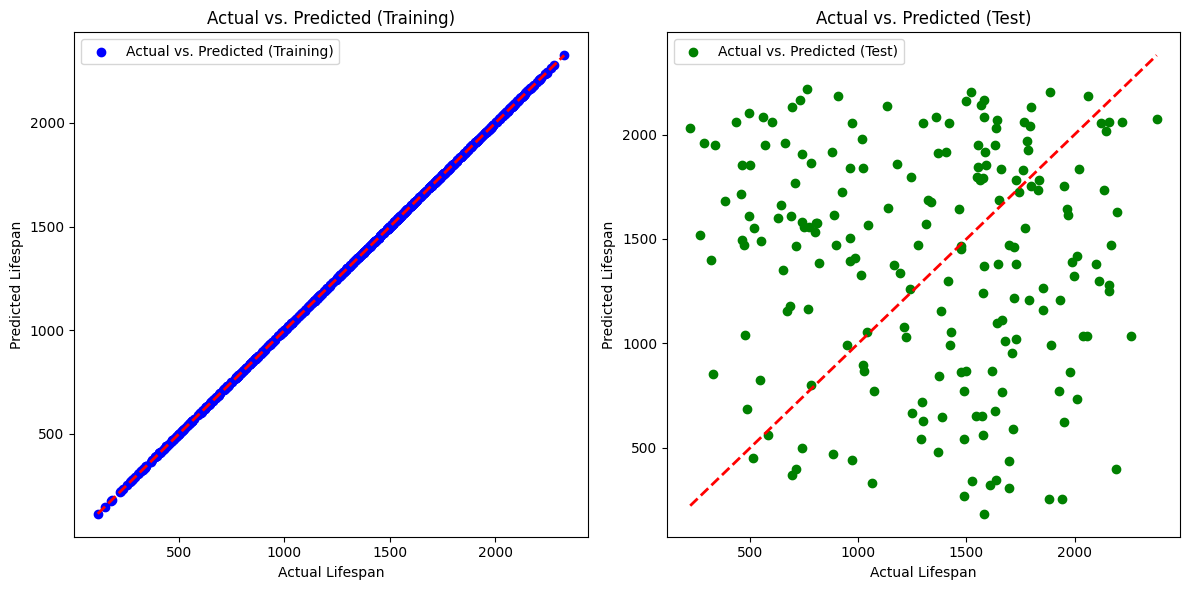

In [ ]:


# Create actual vs. predicted plots for training data
plt.figure(figsize=(12, 6))
plt.subplot(1, 2, 1)
plt.scatter(y_train, y_train_pred, c='b', label='Actual vs. Predicted (Training)')
plt.xlabel('Actual Lifespan')
plt.ylabel('Predicted Lifespan')
plt.title('Actual vs. Predicted (Training)')
plt.legend(loc='upper left')
plt.plot([min(y_train), max(y_train)], [min(y_train), max(y_train)], linestyle='--', color='red', linewidth=2)

# Create actual vs. predicted plots for test data
plt.subplot(1, 2, 2)
plt.scatter(y_test, y_test_pred, c='g', label='Actual vs. Predicted (Test)')
plt.xlabel('Actual Lifespan')
plt.ylabel('Predicted Lifespan')
plt.title('Actual vs. Predicted (Test)')
plt.legend(loc='upper left')
plt.plot([min(y_test), max(y_test)], [min(y_test), max(y_test)], linestyle='--', color='red', linewidth=2)

plt.tight_layout()
plt.show()


#Binary Classification Implementation

Train 70% , Test 30% Splitting

In [5]:
# Create a binary target (1 for lifetime > 1500 hours, 0 otherwise)

df_encoded['NotDefective'] = df_encoded['Lifespan'].apply(lambda x: 1 if x > 1500 else 0)


In [6]:
X = df_encoded.drop(['NotDefective'],axis=1)

y = df_encoded['NotDefective']

In [ ]:
target_counts = df_encoded['NotDefective'].value_counts()

print("Target Label Counts:")
print(target_counts)


Target Label Counts:
0    529
1    471
Name: NotDefective, dtype: int64


In [ ]:
target_counts = df_encoded['NotDefective'].value_counts(normalize=True) * 100

print("Target Label Percentage Distribution:")
print(target_counts)


Target Label Percentage Distribution:
0    52.9
1    47.1
Name: NotDefective, dtype: float64


##Random forest classifier

In [ ]:



# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

# Create a Random Forest Classifier model
rf_classifier = RandomForestClassifier(n_estimators=100, random_state=42)

# Train the model on the training data
rf_classifier.fit(X_train, y_train)

# Make predictions on the test data
y_pred = rf_classifier.predict(X_test)
y_train_pred = rf_classifier.predict(X_train)

accuracy = accuracy_score(y_train, y_train_pred)
conf_matrix = confusion_matrix(y_train, y_train_pred)
class_report = classification_report(y_train, y_train_pred)

print(f"Accuracy: {accuracy:.2f}")
print("Confusion Matrix:\n", conf_matrix)
print("Classification Report:\n", class_report)


# Evaluate the classification model
accuracy = accuracy_score(y_test, y_pred)
conf_matrix = confusion_matrix(y_test, y_pred)
class_report = classification_report(y_test, y_pred)

print(f"Accuracy: {accuracy:.2f}")
print("Confusion Matrix:\n", conf_matrix)
print("Classification Report:\n", class_report)


Accuracy: 1.00
Confusion Matrix:
 [[364   0]
 [  0 336]]
Classification Report:
               precision    recall  f1-score   support

           0       1.00      1.00      1.00       364
           1       1.00      1.00      1.00       336

    accuracy                           1.00       700
   macro avg       1.00      1.00      1.00       700
weighted avg       1.00      1.00      1.00       700

Accuracy: 1.00
Confusion Matrix:
 [[165   0]
 [  0 135]]
Classification Report:
               precision    recall  f1-score   support

           0       1.00      1.00      1.00       165
           1       1.00      1.00      1.00       135

    accuracy                           1.00       300
   macro avg       1.00      1.00      1.00       300
weighted avg       1.00      1.00      1.00       300



##Logistic Regression

In [ ]:



# Create a Logistic Regression model
logistic_model = LogisticRegression(random_state=42)

# Train the model on the training data
logistic_model.fit(X_train, y_train)

# Make predictions on the test data
y_pred = logistic_model.predict(X_test)

y_train_pred = logistic_model.predict(X_train)

accuracy = accuracy_score(y_train, y_train_pred)
conf_matrix = confusion_matrix(y_train, y_train_pred)
class_report = classification_report(y_train, y_train_pred)

print(f"Accuracy: {accuracy:.2f}")
print("Confusion Matrix:\n", conf_matrix)
print("Classification Report:\n", class_report)

# Evaluate the classification model
accuracy = accuracy_score(y_test, y_pred)
conf_matrix = confusion_matrix(y_test, y_pred)
class_report = classification_report(y_test, y_pred)

print(f"Accuracy: {accuracy:.2f}")
print("Confusion Matrix:\n", conf_matrix)
print("Classification Report:\n", class_report)


Accuracy: 0.88
Confusion Matrix:
 [[316  48]
 [ 34 302]]
Classification Report:
               precision    recall  f1-score   support

           0       0.90      0.87      0.89       364
           1       0.86      0.90      0.88       336

    accuracy                           0.88       700
   macro avg       0.88      0.88      0.88       700
weighted avg       0.88      0.88      0.88       700

Accuracy: 0.91
Confusion Matrix:
 [[147  18]
 [  9 126]]
Classification Report:
               precision    recall  f1-score   support

           0       0.94      0.89      0.92       165
           1       0.88      0.93      0.90       135

    accuracy                           0.91       300
   macro avg       0.91      0.91      0.91       300
weighted avg       0.91      0.91      0.91       300



/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


##Decision Tree Classifier

In [ ]:

# Create a Decision Tree Classifier model
decision_tree_model = DecisionTreeClassifier(random_state=42)

# Train the model on the training data
decision_tree_model.fit(X_train, y_train)

# Make predictions on the test and train data
y_pred = decision_tree_model.predict(X_test)

y_train_pred = decision_tree_model.predict(X_train)

# Evaluate the classification model
accuracy = accuracy_score(y_train, y_train_pred)
conf_matrix = confusion_matrix(y_train, y_train_pred)
class_report = classification_report(y_train, y_train_pred)

print(f"Accuracy: {accuracy:.2f}")
print("Confusion Matrix:\n", conf_matrix)
print("Classification Report:\n", class_report)
# Evaluate the classification model
accuracy = accuracy_score(y_test, y_pred)
conf_matrix = confusion_matrix(y_test, y_pred)
class_report = classification_report(y_test, y_pred)

print(f"Accuracy: {accuracy:.2f}")
print("Confusion Matrix:\n", conf_matrix)
print("Classification Report:\n", class_report)


Accuracy: 1.00
Confusion Matrix:
 [[364   0]
 [  0 336]]
Classification Report:
               precision    recall  f1-score   support

           0       1.00      1.00      1.00       364
           1       1.00      1.00      1.00       336

    accuracy                           1.00       700
   macro avg       1.00      1.00      1.00       700
weighted avg       1.00      1.00      1.00       700

Accuracy: 1.00
Confusion Matrix:
 [[165   0]
 [  0 135]]
Classification Report:
               precision    recall  f1-score   support

           0       1.00      1.00      1.00       165
           1       1.00      1.00      1.00       135

    accuracy                           1.00       300
   macro avg       1.00      1.00      1.00       300
weighted avg       1.00      1.00      1.00       300



##Support Vector Classifier

In [ ]:


# Create a Support Vector Classifier (SVC) model
model = SVC(kernel='linear', random_state=42)

# Train the model on the training data
model.fit(X_train, y_train)

# Make predictions on the test and train data
y_pred = model.predict(X_test)
y_train_pred = model.predict(X_train)

# Evaluate the classification model
accuracy = accuracy_score(y_train, y_train_pred)
conf_matrix = confusion_matrix(y_train, y_train_pred)
class_report = classification_report(y_train, y_train_pred)

print(f"Accuracy: {accuracy:.2f}")
print("Confusion Matrix:\n", conf_matrix)
print("Classification Report:\n", class_report)
# Evaluate the classification model
accuracy = accuracy_score(y_test, y_pred)
conf_matrix = confusion_matrix(y_test, y_pred)
class_report = classification_report(y_test, y_pred)

print(f"Accuracy: {accuracy:.2f}")
print("Confusion Matrix:\n", conf_matrix)
print("Classification Report:\n", class_report)


Accuracy: 1.00
Confusion Matrix:
 [[364   0]
 [  0 336]]
Classification Report:
               precision    recall  f1-score   support

           0       1.00      1.00      1.00       364
           1       1.00      1.00      1.00       336

    accuracy                           1.00       700
   macro avg       1.00      1.00      1.00       700
weighted avg       1.00      1.00      1.00       700

Accuracy: 1.00
Confusion Matrix:
 [[165   0]
 [  0 135]]
Classification Report:
               precision    recall  f1-score   support

           0       1.00      1.00      1.00       165
           1       1.00      1.00      1.00       135

    accuracy                           1.00       300
   macro avg       1.00      1.00      1.00       300
weighted avg       1.00      1.00      1.00       300



##Trivial Baseline

Majority class baseline is used when dataset is imbalanced.

So Random class baseline is used when dataset is balanced so random baseline is chosen.

In [ ]:

# Random baseline
def random_baseline(y_true):
    return np.random.choice([0, 1], size=len(y_true))

# Create a random baseline for training data
y_random_train = random_baseline(y_train)

# Evaluate the random baseline on training data
accuracy = accuracy_score(y_train, y_random_train)
conf_matrix = confusion_matrix(y_train, y_random_train)
class_report = classification_report(y_train, y_random_train)

print("Random Baseline Results (Training Data):")
print(f"Accuracy: {accuracy:.2f}")
print("Confusion Matrix:\n", conf_matrix)
print("Classification Report:\n", class_report)

# Create a random baseline for test data
y_random_test = random_baseline(y_test)

# Evaluate the random baseline on test data
accuracy = accuracy_score(y_test, y_random_test)
conf_matrix = confusion_matrix(y_test, y_random_test)
class_report = classification_report(y_test, y_random_test)

print("\nRandom Baseline Results (Test Data):")
print(f"Accuracy: {accuracy:.2f}")
print("Confusion Matrix:\n", conf_matrix)
print("Classification Report:\n", class_report)


Random Baseline Results (Training Data):
Accuracy: 0.52
Confusion Matrix:
 [[187 177]
 [157 179]]
Classification Report:
               precision    recall  f1-score   support

           0       0.54      0.51      0.53       364
           1       0.50      0.53      0.52       336

    accuracy                           0.52       700
   macro avg       0.52      0.52      0.52       700
weighted avg       0.52      0.52      0.52       700


Random Baseline Results (Test Data):
Accuracy: 0.46
Confusion Matrix:
 [[70 95]
 [68 67]]
Classification Report:
               precision    recall  f1-score   support

           0       0.51      0.42      0.46       165
           1       0.41      0.50      0.45       135

    accuracy                           0.46       300
   macro avg       0.46      0.46      0.46       300
weighted avg       0.47      0.46      0.46       300



#Convolutional Neural Network

Train 80%, test 20% split

In [ ]:

import tensorflow as tf
from tensorflow import keras



# Step 1: Load the metadata CSV file
metadata_file = "/drive/My Drive/Colab Notebooks/Term1/ML/Course work/metadata.csv"

metadata_df = pd.read_csv(metadata_file)

# Step 2: Split the data into training and testing sets
train_df, test_df = train_test_split(metadata_df, test_size=0.2, random_state=False)

# Step 3: Create a Data Generator
image_dir = "/drive/My Drive/Colab Notebooks/Term1/ML/Course work/images/images"  # Directory containing your image files
image_size = (150, 150)  # Resize images to a consistent size

datagen = ImageDataGenerator(
    rescale=1.0 / 255,
    validation_split=0.2  # Split a portion of the training data for validation
)

train_data_gen = datagen.flow_from_dataframe(
    dataframe=train_df,
    directory=image_dir,
    x_col='Image Filename',  # Column containing image file names
    y_col='Defect',  # Column containing binary labels ('Yes' or 'No')
    target_size=image_size,
    batch_size=32,
    class_mode='binary',  # Convert 'Yes' to 1 and 'No' to 0
    subset='training'  # Select the training data
)

valid_data_gen = datagen.flow_from_dataframe(
    dataframe=train_df,
    directory=image_dir,
    x_col='Image Filename',
    y_col='Defect',
    target_size=image_size,
    batch_size=32,
    class_mode='binary',
    subset='validation'  # Select the validation data
)

test_data_gen = datagen.flow_from_dataframe(
    dataframe=test_df,
    directory=image_dir,
    x_col='Image Filename',
    y_col='Defect',
    target_size=image_size,
    batch_size=32,
    class_mode='binary'
)


# Step 4: Create and Train the CNN Model
model = keras.Sequential([
    keras.layers.Conv2D(32, (3, 3), activation='relu', input_shape=(150, 150, 3)),
    keras.layers.MaxPooling2D(2, 2),
    keras.layers.Conv2D(64, (3, 3), activation='relu'),
    keras.layers.MaxPooling2D(2, 2),
    keras.layers.Conv2D(128, (3, 3), activation='relu'),
    keras.layers.MaxPooling2D(2, 2),
    keras.layers.Flatten(),
    keras.layers.Dense(128, activation='relu'),
    keras.layers.Dense(1, activation='sigmoid')
])

model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])

epochs = 10
history = model.fit(
    train_data_gen,
    validation_data=valid_data_gen,
    epochs=epochs
)

# Step 5: Evaluate the Model
#It calculates accuracy as the ratio of correctly classified samples to the total number of samples in the test dataset.
test_loss, test_accuracy = model.evaluate(test_data_gen)
print(f"Test Accuracy: {test_accuracy}")


# Save the model for future use
model.save('defect_detection_model.h5')

Found 640 validated image filenames belonging to 2 classes.
Found 160 validated image filenames belonging to 2 classes.
Found 200 validated image filenames belonging to 2 classes.
Epoch 1/10
20/20 [==============================] - 226s 11s/step - loss: 0.7938 - accuracy: 0.5375 - val_loss: 0.6445 - val_accuracy: 0.6062
Epoch 2/10
20/20 [==============================] - 35s 2s/step - loss: 0.4711 - accuracy: 0.7906 - val_loss: 0.2517 - val_accuracy: 0.9125
Epoch 3/10
20/20 [==============================] - 35s 2s/step - loss: 0.1974 - accuracy: 0.9344 - val_loss: 0.2393 - val_accuracy: 0.9250
Epoch 4/10
20/20 [==============================] - 35s 2s/step - loss: 0.4173 - accuracy: 0.8781 - val_loss: 0.7872 - val_accuracy: 0.6375
Epoch 5/10
20/20 [==============================] - 37s 2s/step - loss: 0.4932 - accuracy: 0.7344 - val_loss: 0.3393 - val_accuracy: 0.8813
Epoch 6/10
20/20 [==============================] - 34s 2s/step - loss: 0.2208 - accuracy: 0.9344 - val_loss: 0.2959 -

##Plot and Performance Metrics

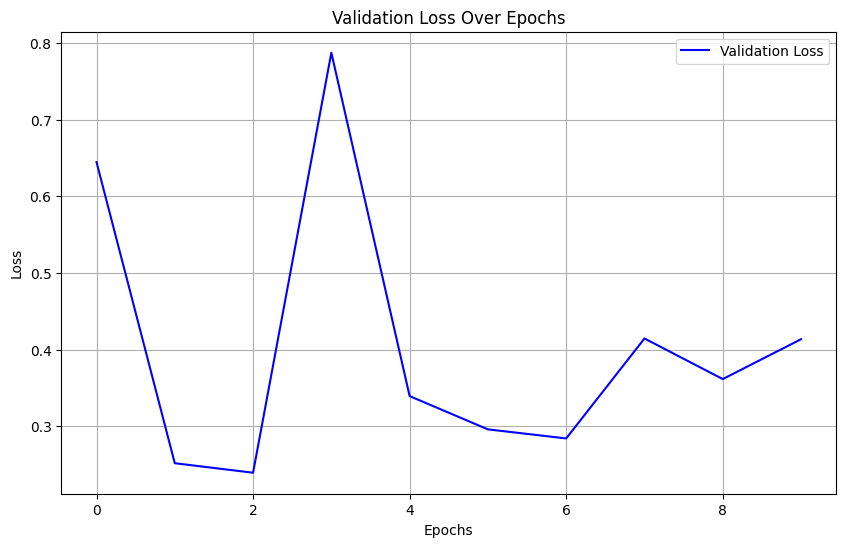

20/20 [==============================] - 14s 635ms/step


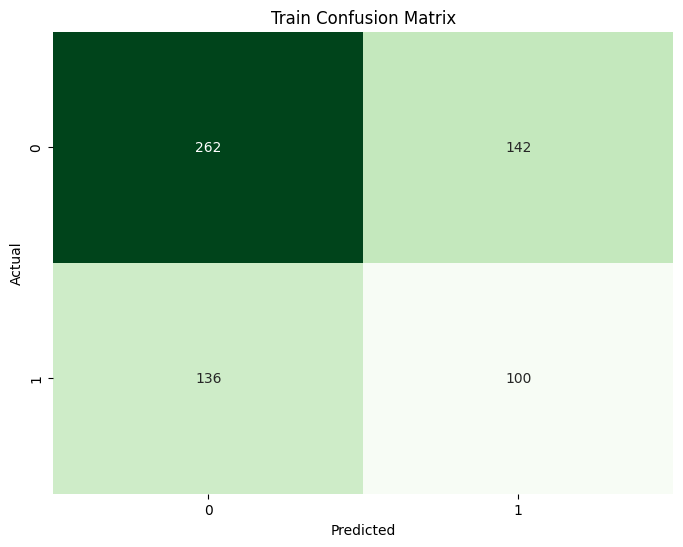

Training Accuracy: 0.565625
Training Precision: 0.4132231404958678
Training Recall: 0.423728813559322
Training F1 Score: 0.41841004184100417
7/7 [==============================] - 3s 451ms/step


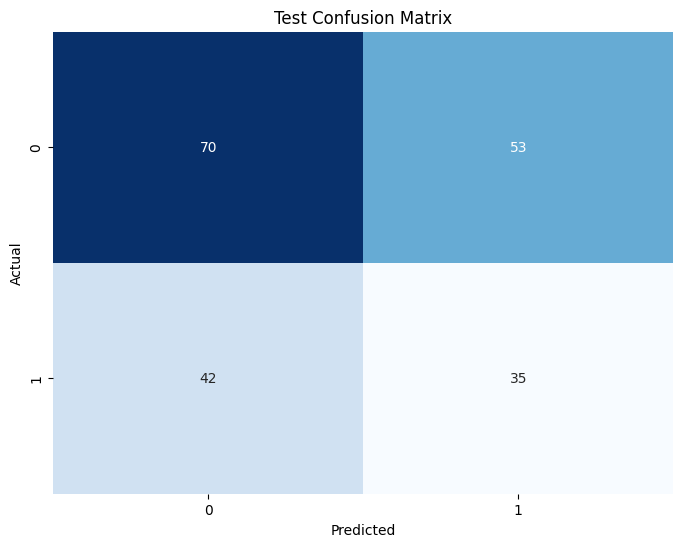

Test Accuracy: 0.525
Test Precision: 0.3977272727272727
Test Recall: 0.45454545454545453
Test F1 Score: 0.4242424242424242


In [ ]:

# Plot the validation loss curve
plt.figure(figsize=(10, 6))
plt.plot(history.history['val_loss'], label='Validation Loss', color='blue')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.title('Validation Loss Over Epochs')
plt.legend()
plt.grid(True)
plt.show()

# Calculate and plot the confusion matrix for training data
train_predictions = model.predict(train_data_gen)
train_labels = train_data_gen.labels
train_predictions_binary = (train_predictions > 0.5).astype(int) # When you make binary classifications (e.g., "Defect" or "No Defect"), you often use a threshold of 0.5 to determine the predicted class.
#If the prediction is greater than 0.5, it's considered as the positive class; otherwise, it's considered as the negative class.

confusion_train = confusion_matrix(train_labels, train_predictions_binary)
plt.figure(figsize=(8, 6))
sns.heatmap(confusion_train, annot=True, fmt="d", cmap="Greens", cbar=False)
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Train Confusion Matrix')
plt.show()

# Calculate confusion metrics and accuracy for training data
accuracy_train = accuracy_score(train_labels, train_predictions_binary)
precision_train = precision_score(train_labels, train_predictions_binary)
recall_train = recall_score(train_labels, train_predictions_binary)
f1_train = f1_score(train_labels, train_predictions_binary)

#The accuracy is calculated as (TP + TN) / (TP + TN + FP + FN).
#It measures the ratio of correctly classified samples (both positive and negative) to the total number of samples.
print("Training Accuracy:", accuracy_train)
print("Training Precision:", precision_train)
print("Training Recall:", recall_train)
print("Training F1 Score:", f1_train)

# Calculate and plot the confusion matrix for test data
test_predictions = model.predict(test_data_gen)
test_labels = test_data_gen.labels
test_predictions_binary = (test_predictions > 0.5).astype(int)

confusion_test = confusion_matrix(test_labels, test_predictions_binary)
plt.figure(figsize=(8, 6))
sns.heatmap(confusion_test, annot=True, fmt="d", cmap="Blues", cbar=False)
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Test Confusion Matrix')
plt.show()

# Calculate confusion metrics and accuracy for test data
accuracy_test = accuracy_score(test_labels, test_predictions_binary)
precision_test = precision_score(test_labels, test_predictions_binary)
recall_test = recall_score(test_labels, test_predictions_binary)
f1_test = f1_score(test_labels, test_predictions_binary)

print("Test Accuracy:", accuracy_test)
print("Test Precision:", precision_test)
print("Test Recall:", recall_test)
print("Test F1 Score:", f1_test)

#Clustering

#Kmeans

In [ ]:
df_encoded

,partType,microstructure,seedLocation,castType,Lifespan,coolingRate,quenchTime,forgeTime,smallDefects,largeDefects,sliverDefects
0,0,0,1,2,284.161690,25,4.460592,7.937116,22,0,7
1,0,2,0,1,1599.551748,9,1.425973,2.432948,2,0,0
2,2,0,0,2,768.311031,26,2.508879,3.841211,25,0,0
3,0,0,0,0,1697.663828,12,3.248913,2.610700,10,0,0
4,2,0,1,1,1491.478862,20,1.901670,4.634926,24,0,0
...,...,...,...,...,...,...,...,...,...,...,...
995,0,1,0,0,462.984817,24,2.023624,2.741713,20,0,0
996,2,1,0,2,1426.298870,21,1.741670,7.206022,12,0,0
997,0,0,1,2,1538.072772,14,1.658847,8.276388,12,0,0
998,2,1,0,0,1893.052813,9,2.124314,5.033330,0,0,0


## Cooling-smalldefects



*   Below k=2 show that there are resonable two groups and distinguished resonably.




/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


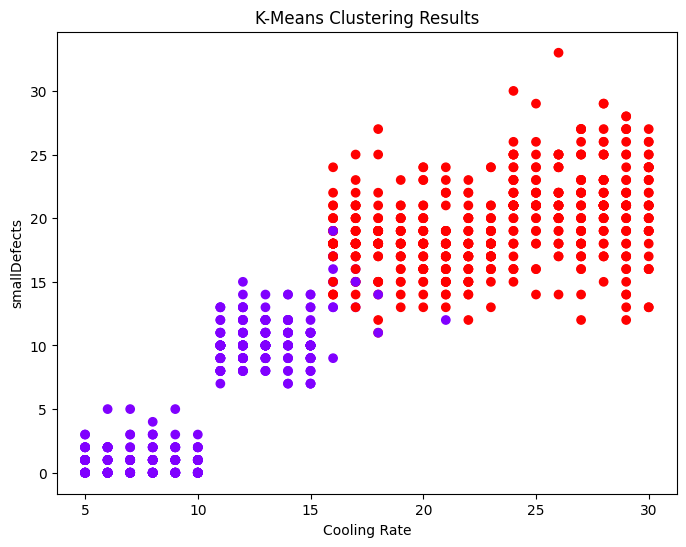

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

from sklearn.preprocessing import StandardScaler

# Load your tabular dataset
# Assuming the dataset is named df_Metal
df_Metal_2 = df_encoded
# Select the continuous variables for clustering
# Assuming 'coolingRate' and 'quenchTime' are selected variables for clustering
selected_columns = ['coolingRate', 'quenchTime','Lifespan','smallDefects']

# Standardize the selected variables (optional but recommended)
scaler = StandardScaler()
data = df_Metal_2[selected_columns].copy()
data = scaler.fit_transform(data)

# Define the number of clusters (k)
k = 2  # Adjust the number of clusters as needed

# Apply K-Means clustering
kmeans = KMeans(n_clusters=k, random_state=0).fit(data)

# Add cluster labels to your dataset
df_Metal_2['Cluster'] = kmeans.labels_

# Create a scatter plot to visualize the clustering results
plt.figure(figsize=(8, 6))
plt.scatter(df_Metal_2['coolingRate'], df_Metal_2['smallDefects'], c=df_Metal_2['Cluster'], cmap='rainbow')
plt.xlabel('Cooling Rate')
plt.ylabel('smallDefects')
plt.title('K-Means Clustering Results')
plt.show()




##K=3


*   K=3 show that data is more disturbed and is not grouped accordingly and is overlapping on each other.




/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


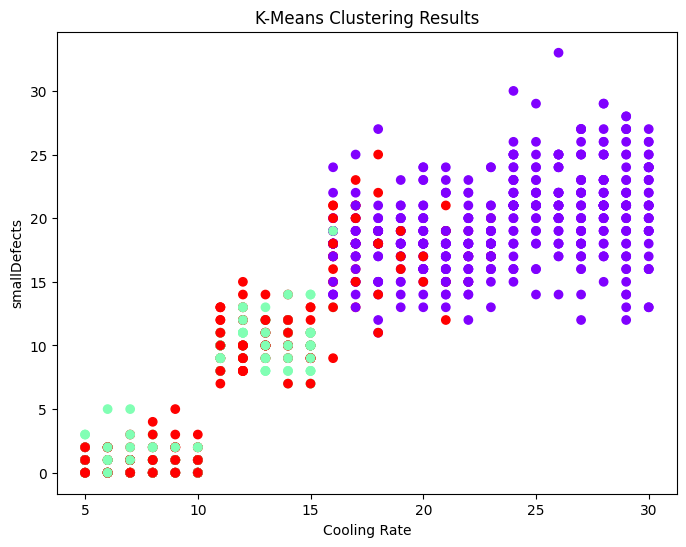

In [ ]:
# Load your tabular dataset
# Assuming the dataset is named df_Metal
df_Metal_2 = df_encoded
# Select the continuous variables for clustering
# Assuming 'coolingRate' and 'quenchTime' are selected variables for clustering
selected_columns = ['coolingRate', 'quenchTime','Lifespan','smallDefects']

# Standardize the selected variables (optional but recommended)
scaler = StandardScaler()
data = df_Metal_2[selected_columns].copy()
data = scaler.fit_transform(data)

# Define the number of clusters (k)
k = 3  # Adjust the number of clusters as needed

# Apply K-Means clustering
kmeans = KMeans(n_clusters=k, random_state=0).fit(data)

# Add cluster labels to your dataset
df_Metal_2['Cluster'] = kmeans.labels_

# Create a scatter plot to visualize the clustering results
plt.figure(figsize=(8, 6))
plt.scatter(df_Metal_2['coolingRate'], df_Metal_2['smallDefects'], c=df_Metal_2['Cluster'], cmap='rainbow')
plt.xlabel('Cooling Rate')
plt.ylabel('smallDefects')
plt.title('K-Means Clustering Results')
plt.show()

##Quench time - small defects

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


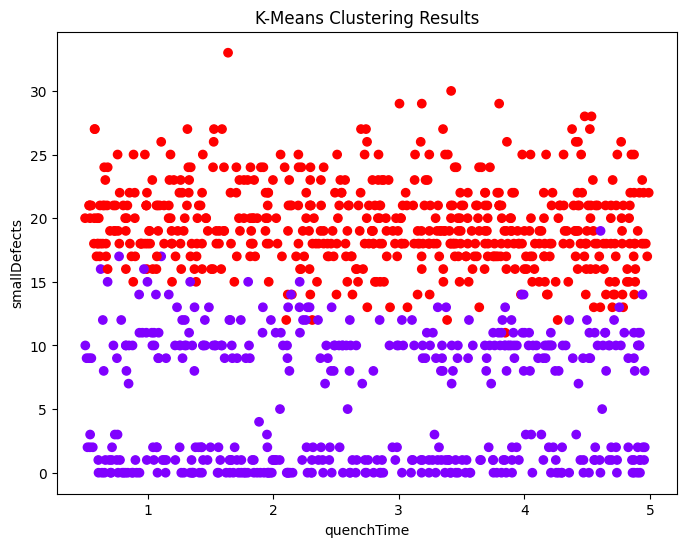

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans
from sklearn.preprocessing import StandardScaler

# Load your tabular dataset
# Assuming the dataset is named df_Metal
df_Metal_2 = df_encoded
# Select the continuous variables for clustering
# Assuming 'coolingRate' and 'quenchTime' are selected variables for clustering
selected_columns = ['coolingRate', 'quenchTime','Lifespan','smallDefects']

# Standardize the selected variables (optional but recommended)
scaler = StandardScaler()
data = df_Metal_2[selected_columns].copy()
data = scaler.fit_transform(data)

# Define the number of clusters (k)
k = 2  # Adjust the number of clusters as needed

# Apply K-Means clustering
kmeans = KMeans(n_clusters=k, random_state=0).fit(data)

# Add cluster labels to your dataset
df_Metal_2['Cluster'] = kmeans.labels_

# Create a scatter plot to visualize the clustering results
plt.figure(figsize=(8, 6))
plt.scatter(df_Metal_2['quenchTime'] ,df_Metal_2['smallDefects'], c=df_Metal_2['Cluster'], cmap='rainbow')
plt.xlabel('quenchTime')
plt.ylabel('smallDefects')
plt.title('K-Means Clustering Results')
plt.show()




##k=3

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


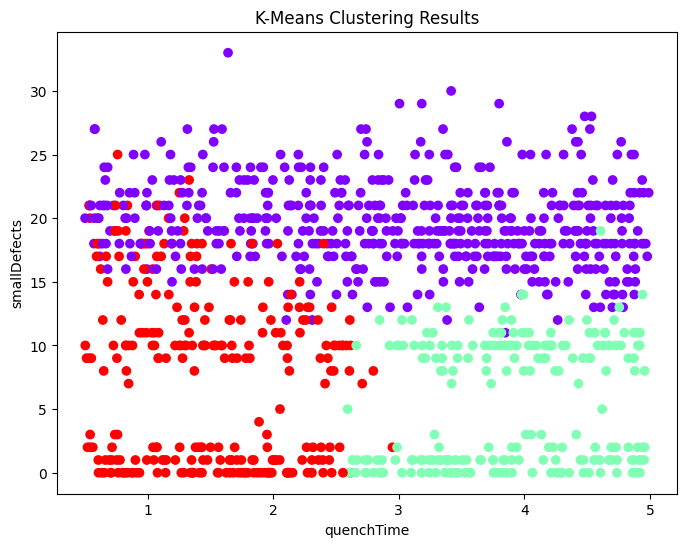

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans
from sklearn.preprocessing import StandardScaler

# Load your tabular dataset
# Assuming the dataset is named df_Metal
df_Metal_2 = df_encoded
# Select the continuous variables for clustering
# Assuming 'coolingRate' and 'quenchTime' are selected variables for clustering
selected_columns = ['coolingRate', 'quenchTime','Lifespan','smallDefects']

# Standardize the selected variables (optional but recommended)
scaler = StandardScaler()
data = df_Metal_2[selected_columns].copy()
data = scaler.fit_transform(data)

# Define the number of clusters (k)
k = 3  # Adjust the number of clusters as needed

# Apply K-Means clustering
kmeans = KMeans(n_clusters=k, random_state=0).fit(data)

# Add cluster labels to your dataset
df_Metal_2['Cluster'] = kmeans.labels_

# Create a scatter plot to visualize the clustering results
plt.figure(figsize=(8, 6))
plt.scatter(df_Metal_2['quenchTime'] ,df_Metal_2['smallDefects'], c=df_Metal_2['Cluster'], cmap='rainbow')
plt.xlabel('quenchTime')
plt.ylabel('smallDefects')
plt.title('K-Means Clustering Results')
plt.show()




#DBSCAN

Based on the colors k value can be determined as 8, but the grouping is not resonable, as they are more distributed and not around any centroid.

DBSCAN(eps=0.30, min_samples=9)
Epsilon (eps): This parameter defines the maximum distance between two data points for one to be considered as in the neighborhood of the other.

Min Samples (min_samples): This parameter specifies the minimum number of data points required to form a dense region (cluster).

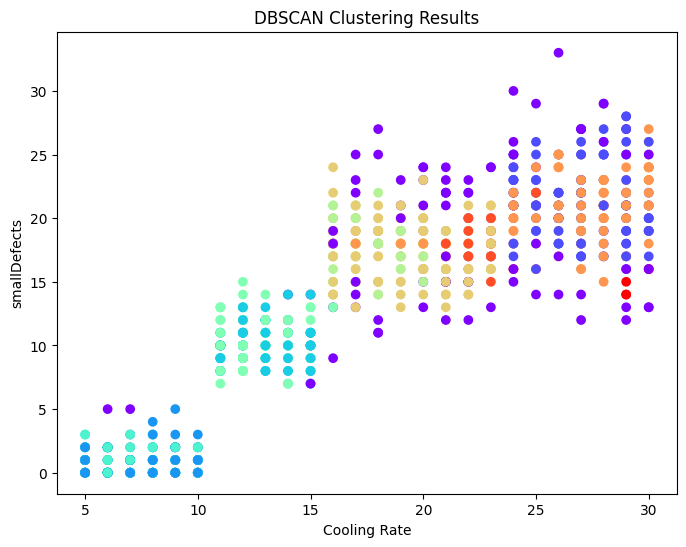

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.cluster import DBSCAN
from sklearn.preprocessing import StandardScaler

df_Metal_2 = df_encoded
# Load your tabular dataset
# Assuming the dataset is named df_Metal

# Select the continuous variables for clustering
selected_columns = ['coolingRate', 'quenchTime','smallDefects', 'Lifespan']

# Standardize the selected variables (optional but recommended)
scaler = StandardScaler()
data = df_Metal_2[selected_columns].copy()
data = scaler.fit_transform(data)

# Apply DBSCAN clustering
dbscan = DBSCAN(eps=0.3, min_samples=5)  # Adjust the parameters (eps and min_samples) as needed
cluster_labels = dbscan.fit_predict(data)

# Add cluster labels to your dataset
df_Metal_2['DB_Cluster'] = cluster_labels

# Create a scatter plot to visualize the clustering results
plt.figure(figsize=(8, 6))
plt.scatter(df_Metal_2['coolingRate'], df_Metal_2['smallDefects'], c=df_Metal_2['DB_Cluster'], cmap='rainbow')
plt.xlabel('Cooling Rate')
plt.ylabel('smallDefects')
plt.title('DBSCAN Clustering Results')
plt.show()


##silhouette_score


*   Below silhouette_score 0.6 indicate that k=2 is optimal for cooling rate and small defects
*   Below silhouette_score 0.52 indicate that k=4 is optimal for cooling rate and quenchtime
*   Below silhouette_score 0.5 indicate that k=5 is optimal for quenchtime and small defect



/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:8

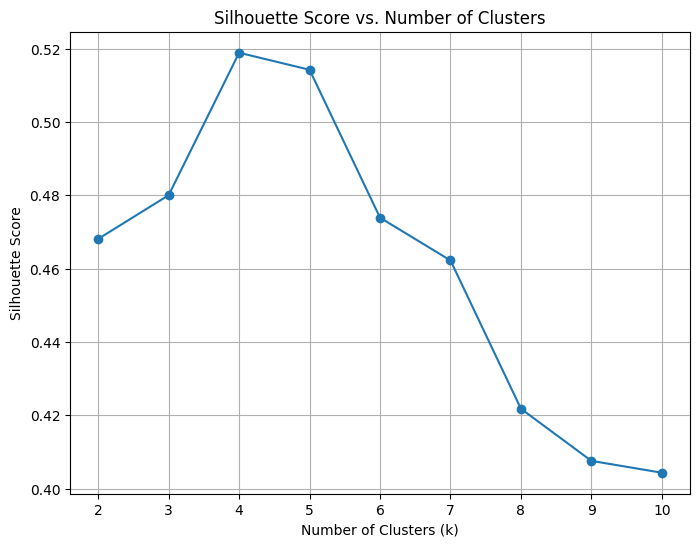

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score

# Load your tabular dataset
# Assuming the dataset is named df_Metal
df_Metal_2 = df_encoded
# Select the continuous variables for clustering
selected_columns = ['coolingRate', 'quenchTime', 'Lifespan']

# Standardize the selected variables (optional but recommended)
scaler = StandardScaler()
data = df_Metal_2[selected_columns].copy()
data = scaler.fit_transform(data)

# Define a range of values for k (number of clusters)
k_values = range(2, 11)  # You can adjust this range as needed

# Initialize lists to store Silhouette Scores for each value of k
silhouette_scores = []

# Calculate Silhouette Score for each value of k
for k in k_values:
    kmeans = KMeans(n_clusters=k, random_state=0)
    cluster_labels = kmeans.fit_predict(data)
    silhouette_avg = silhouette_score(data, cluster_labels)
    silhouette_scores.append(silhouette_avg)

# Plot the Silhouette Score for different values of k
plt.figure(figsize=(8, 6))
plt.plot(k_values, silhouette_scores, marker='o', linestyle='-')
plt.xlabel('Number of Clusters (k)')
plt.ylabel('Silhouette Score')
plt.title('Silhouette Score vs. Number of Clusters')
plt.grid()
plt.show()


/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:8

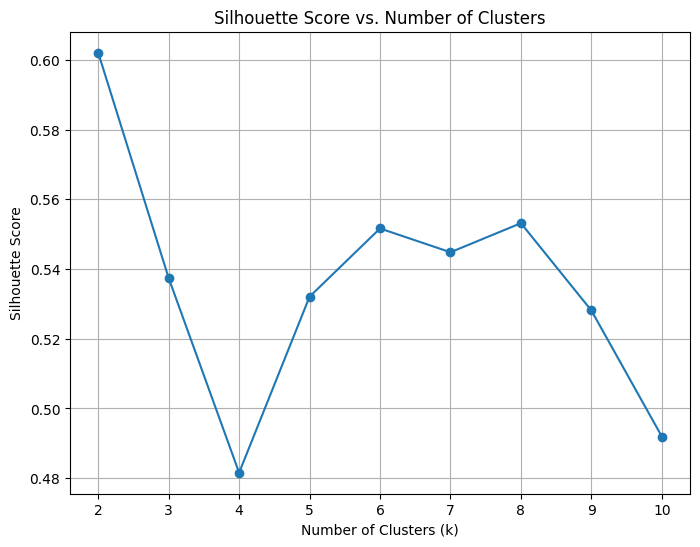

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score

# Load your tabular dataset
# Assuming the dataset is named df_Metal
df_Metal_2 = df_encoded
# Select the continuous variables for clustering
selected_columns = ['coolingRate', 'smallDefects', 'Lifespan']

# Standardize the selected variables (optional but recommended)
scaler = StandardScaler()
data = df_Metal_2[selected_columns].copy()
data = scaler.fit_transform(data)

# Define a range of values for k (number of clusters)
k_values = range(2, 11)  # You can adjust this range as needed

# Initialize lists to store Silhouette Scores for each value of k
silhouette_scores = []

# Calculate Silhouette Score for each value of k
for k in k_values:
    kmeans = KMeans(n_clusters=k, random_state=0)
    cluster_labels = kmeans.fit_predict(data)
    silhouette_avg = silhouette_score(data, cluster_labels)
    silhouette_scores.append(silhouette_avg)

# Plot the Silhouette Score for different values of k
plt.figure(figsize=(8, 6))
plt.plot(k_values, silhouette_scores, marker='o', linestyle='-')
plt.xlabel('Number of Clusters (k)')
plt.ylabel('Silhouette Score')
plt.title('Silhouette Score vs. Number of Clusters')
plt.grid()
plt.show()


/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:8

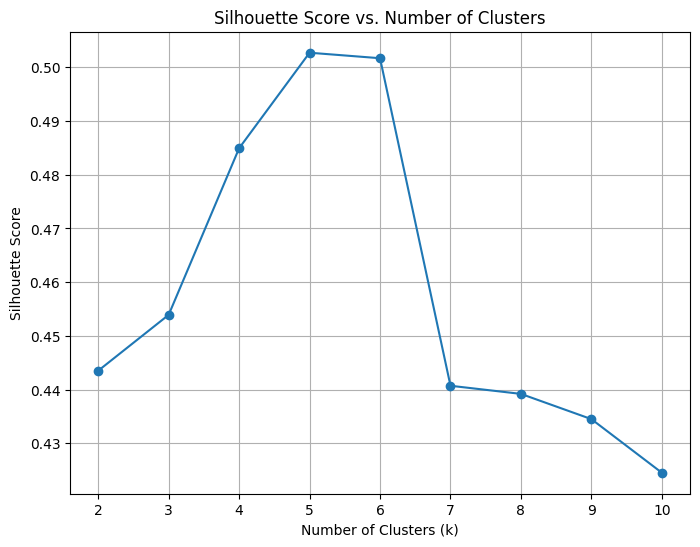

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score

# Load your tabular dataset
# Assuming the dataset is named df_Metal
df_Metal_2 = df_encoded
# Select the continuous variables for clustering
selected_columns = ['quenchTime', 'smallDefects', 'Lifespan']

# Standardize the selected variables (optional but recommended)
scaler = StandardScaler()
data = df_Metal_2[selected_columns].copy()
data = scaler.fit_transform(data)

# Define a range of values for k (number of clusters)
k_values = range(2, 11)  # You can adjust this range as needed

# Initialize lists to store Silhouette Scores for each value of k
silhouette_scores = []

# Calculate Silhouette Score for each value of k
for k in k_values:
    kmeans = KMeans(n_clusters=k, random_state=0)
    cluster_labels = kmeans.fit_predict(data)
    silhouette_avg = silhouette_score(data, cluster_labels)
    silhouette_scores.append(silhouette_avg)

# Plot the Silhouette Score for different values of k
plt.figure(figsize=(8, 6))
plt.plot(k_values, silhouette_scores, marker='o', linestyle='-')
plt.xlabel('Number of Clusters (k)')
plt.ylabel('Silhouette Score')
plt.title('Silhouette Score vs. Number of Clusters')
plt.grid()
plt.show()


#Parameter tuning

Train 80% test 20%

In [ ]:


# Step 1: Load the metadata CSV file
metadata_file = "/drive/My Drive/Colab Notebooks/Term1/ML/Course work/metadata.csv"
metadata_df = pd.read_csv(metadata_file)

# Step 2: Split the data into training and testing sets
train_df, test_df = train_test_split(metadata_df, test_size=0.2, random_state=False)


# Step 3: Create a Data Generator
image_dir = "/drive/My Drive/Colab Notebooks/Term1/ML/Course work/images/images"
image_size = (150, 150)

datagen = ImageDataGenerator(
    rescale=1.0 / 255,
    validation_split=0.2
)

train_data_gen = datagen.flow_from_dataframe(
    dataframe=train_df,
    directory=image_dir,
    x_col='Image Filename',
    y_col='Defect',
    target_size=image_size,
    batch_size=20,
    class_mode='binary',
    subset='training'
)

valid_data_gen = datagen.flow_from_dataframe(
    dataframe=train_df,
    directory=image_dir,
    x_col='Image Filename',
    y_col='Defect',
    target_size=image_size,
    batch_size=20,
    class_mode='binary',
    subset='validation'
)

test_data_gen = datagen.flow_from_dataframe(
    dataframe=test_df,
    directory=image_dir,
    x_col='Image Filename',
    y_col='Defect',
    target_size=image_size,
    batch_size=20,
    class_mode='binary'
)

# Define your CNN model as a function
def create_cnn_model(filters=32, kernel_size=(3, 3), dense_units=128):
    model = keras.Sequential([
        keras.layers.Conv2D(filters, kernel_size, activation='relu', input_shape=(image_size[0], image_size[1], 3)),
        keras.layers.MaxPooling2D(2, 2),
        keras.layers.Conv2D(filters, kernel_size, activation='relu'),
        keras.layers.MaxPooling2D(2, 2),
        keras.layers.Flatten(),
        keras.layers.Dense(dense_units, activation='relu'),
        keras.layers.Dense(1, activation='sigmoid')  # Sigmoid activation for binary classification
    ])

    model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])
    return model

# Define hyperparameter grid to search over
param_grid = {
    'filters': [32, 64, 128],
    'kernel_size': [(3, 3), (4, 4), (5, 5)],
    'dense_units': [64, 128, 256]
}

# Create a KerasClassifier for use with GridSearchCV
cnn_model = keras.wrappers.scikit_learn.KerasClassifier(build_fn=create_cnn_model, epochs=10, batch_size=20, verbose=0)

# Create GridSearchCV instance
grid_search = GridSearchCV(cnn_model, param_grid, cv=3)

# Fit the GridSearchCV to your training data
#grid_search.fit(train_data_gen, train_df['Defect'], validation_data=(valid_data_gen, valid_data_gen.labels))

grid_search.fit(train_data_gen, validation_data=valid_data_gen.labels)

# Print the best hyperparameters found by GridSearchCV
print("Best Hyperparameters:")
print(grid_search.best_params_)

# Get the best model
best_model = grid_search.best_estimator_

# Evaluate the best model on the test data
test_loss, test_accuracy = best_model.model.evaluate(test_data_gen)

# Make predictions with the best model
test_predictions = best_model.predict(test_data_gen)

# Convert predictions to binary values
test_predictions_binary = (test_predictions > 0.5).astype(int)

# Calculate confusion matrix
confusion = confusion_matrix(test_data_gen.labels, test_predictions_binary)

# Print confusion matrix
print("Confusion Matrix:")
print(confusion)

# Calculate and print classification report
class_report = classification_report(test_data_gen.labels, test_predictions_binary)
print("Classification Report:")
print(class_report)

# Plot confusion matrix (optional)
plt.imshow(confusion, cmap='Blues', interpolation='nearest')
plt.colorbar()
plt.title('Confusion Matrix')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.show()


Found 640 validated image filenames belonging to 2 classes.
Found 160 validated image filenames belonging to 2 classes.
Found 200 validated image filenames belonging to 2 classes.


<ipython-input-17-b9d2585590fb>:75: DeprecationWarning: KerasClassifier is deprecated, use Sci-Keras (https://github.com/adriangb/scikeras) instead. See https://www.adriangb.com/scikeras/stable/migration.html for help migrating.
  cnn_model = keras.wrappers.scikit_learn.KerasClassifier(build_fn=create_cnn_model, epochs=10, batch_size=20, verbose=0)


ValueError: ignored

In [ ]:
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Flatten, Dense
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from sklearn.metrics import classification_report, confusion_matrix


train_gen = train_data_gen
test_gen =test_data_gen
# Build CNN model
model = Sequential()
model.add(Conv2D(32, 3, activation='relu', input_shape=(150, 150, 3)))
model.add(MaxPooling2D(2))

model.add(Conv2D(64, 3, activation='relu'))
model.add(MaxPooling2D(2))

model.add(Conv2D(128, 3, activation='relu'))
model.add(Flatten())
model.add(Dense(1, activation='sigmoid'))

# Tune model hyperparameters
batch_size = [16, 32, 64]
epochs = [10, 20]

for bs in batch_size:
  for epoch in epochs:

    model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['acc'])

    model.fit(train_gen, epochs=epoch, batch_size=bs, verbose=1)

    # Evaluate model
    loss, acc = model.evaluate(test_gen)
    print(f'Batch Size: {bs} Epochs: {epoch} Accuracy: {acc:.3f}')

    y_pred = model.predict(test_gen)

    print(classification_report(test_gen.classes, y_pred.round()))
    print(confusion_matrix(test_gen.classes, y_pred.round()))

# Save best model
model.save('defect_detection.h5')

Epoch 1/10
32/32 [==============================] - 33s 898ms/step - loss: 0.6169 - acc: 0.6578
Epoch 2/10
32/32 [==============================] - 28s 870ms/step - loss: 0.2814 - acc: 0.8906
Epoch 3/10
32/32 [==============================] - 28s 869ms/step - loss: 0.1861 - acc: 0.9344
Epoch 4/10
32/32 [==============================] - 28s 882ms/step - loss: 0.3094 - acc: 0.9016
Epoch 5/10
32/32 [==============================] - 27s 817ms/step - loss: 0.1380 - acc: 0.9594
Epoch 6/10
32/32 [==============================] - 31s 936ms/step - loss: 0.1249 - acc: 0.9625
Epoch 7/10
32/32 [==============================] - 28s 866ms/step - loss: 0.1141 - acc: 0.9656
Epoch 8/10
32/32 [==============================] - 28s 870ms/step - loss: 0.0851 - acc: 0.9812
Epoch 9/10
32/32 [==============================] - 25s 792ms/step - loss: 0.0715 - acc: 0.9859
Epoch 10/10
10/10 [==============================] - 36s 4s/step - loss: 0.2575 - acc: 0.9200
Batch Size: 16 Epochs: 10 Accuracy: 0.920


#Trivial Baseline

In [7]:


# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

# Random baseline
def random_baseline(y_true):
    return np.random.choice([0, 1], size=len(y_true))

# Create a random baseline for training data
y_random_train = random_baseline(y_train)

# Evaluate the random baseline on training data
accuracy = accuracy_score(y_train, y_random_train)
conf_matrix = confusion_matrix(y_train, y_random_train)
class_report = classification_report(y_train, y_random_train)

print("Random Baseline Results (Training Data):")
print(f"Accuracy: {accuracy:.2f}")
print("Confusion Matrix:\n", conf_matrix)
print("Classification Report:\n", class_report)

# Create a random baseline for test data
y_random_test = random_baseline(y_test)

# Evaluate the random baseline on test data
accuracy = accuracy_score(y_test, y_random_test)
conf_matrix = confusion_matrix(y_test, y_random_test)
class_report = classification_report(y_test, y_random_test)

print("\nRandom Baseline Results (Test Data):")
print(f"Accuracy: {accuracy:.2f}")
print("Confusion Matrix:\n", conf_matrix)
print("Classification Report:\n", class_report)


Random Baseline Results (Training Data):
Accuracy: 0.47
Confusion Matrix:
 [[174 190]
 [182 154]]
Classification Report:
               precision    recall  f1-score   support

           0       0.49      0.48      0.48       364
           1       0.45      0.46      0.45       336

    accuracy                           0.47       700
   macro avg       0.47      0.47      0.47       700
weighted avg       0.47      0.47      0.47       700


Random Baseline Results (Test Data):
Accuracy: 0.48
Confusion Matrix:
 [[75 90]
 [66 69]]
Classification Report:
               precision    recall  f1-score   support

           0       0.53      0.45      0.49       165
           1       0.43      0.51      0.47       135

    accuracy                           0.48       300
   macro avg       0.48      0.48      0.48       300
weighted avg       0.49      0.48      0.48       300

